In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale
from sklearn import linear_model
%matplotlib inline

In [229]:
team_valuation = pd.read_csv("../input/nba_2017_team_valuations.csv"); team_valuation.head()

,TEAM,VALUE_MILLIONS
0,New York Knicks,3300.0
1,Los Angeles Lakers,3000.0
2,Golden State Warriors,2600.0
3,Chicago Bulls,2500.0
4,Boston Celtics,2200.0


In [230]:
salary_df = pd.read_csv("../input/nba_2017_salary.csv")
salary_df.rename(columns={'NAME':'PLAYER'},inplace=True)
salary_df = salary_df.merge(team_valuation, how = 'left', on = 'TEAM')
salary_df.head()

,PLAYER,POSITION,TEAM,SALARY,VALUE_MILLIONS
0,LeBron James,SF,Cleveland Cavaliers,30963450.0,1200.0
1,Mike Conley,PG,Memphis Grizzlies,26540100.0,790.0
2,Al Horford,C,Boston Celtics,26540100.0,2200.0
3,Dirk Nowitzki,PF,Dallas Mavericks,25000000.0,1450.0
4,Carmelo Anthony,SF,New York Knicks,24559380.0,3300.0


In [231]:
pie_df = pd.read_csv("../input/nba_2017_pie.csv")
pie_df = pie_df[['PLAYER','AGE','GP','W','L']]
pie_df['WIN_RATE'] = pie_df['W'] / pie_df['GP']
pie_df = pie_df[['PLAYER','AGE','WIN_RATE']]
pie_df.head()

,PLAYER,AGE,WIN_RATE
0,Russell Westbrook,28,0.567901
1,Boban Marjanovic,28,0.457143
2,Demetrius Jackson,22,0.200000
3,Anthony Davis,24,0.413333
4,James Harden,27,0.666667


In [254]:
pie_df = pie_df.merge(salary_df, how = 'left', on = 'PLAYER'); pie_df.head()

,PLAYER,AGE,WIN_RATE,POSITION,TEAM,SALARY,VALUE_MILLIONS
0,Russell Westbrook,28,0.567901,PG,Oklahoma City Thunder,26500000.0,1025.0
1,Boban Marjanovic,28,0.457143,C,Detroit Pistons,7000000.0,900.0
2,Demetrius Jackson,22,0.200000,G,Boston Celtics,1450000.0,2200.0
3,Demetrius Jackson,22,0.200000,G,Boston Celtics,1384750.0,2200.0
4,Anthony Davis,24,0.413333,PF,New Orleans Pelicans,22116750.0,750.0


In [244]:
twitter_players = pd.read_csv("../input/nba_2017_twitter_players.csv"); twitter_players.head()

,PLAYER,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,2130.5,559.0
1,James Harden,969.0,321.5
2,Isaiah Thomas,467.5,155.5
3,Anthony Davis,368.0,104.0
4,DeMar DeRozan,0.0,186.0


In [256]:
social_influence = pie_df.merge(twitter_players, how = 'left', on = 'PLAYER')
social_influence.head()

,PLAYER,AGE,WIN_RATE,POSITION,TEAM,SALARY,VALUE_MILLIONS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,Russell Westbrook,28,0.567901,PG,Oklahoma City Thunder,26500000.0,1025.0,2130.5,559.0
1,Boban Marjanovic,28,0.457143,C,Detroit Pistons,7000000.0,900.0,NaN,NaN
2,Demetrius Jackson,22,0.200000,G,Boston Celtics,1450000.0,2200.0,NaN,NaN
3,Demetrius Jackson,22,0.200000,G,Boston Celtics,1384750.0,2200.0,NaN,NaN
4,Anthony Davis,24,0.413333,PF,New Orleans Pelicans,22116750.0,750.0,368.0,104.0


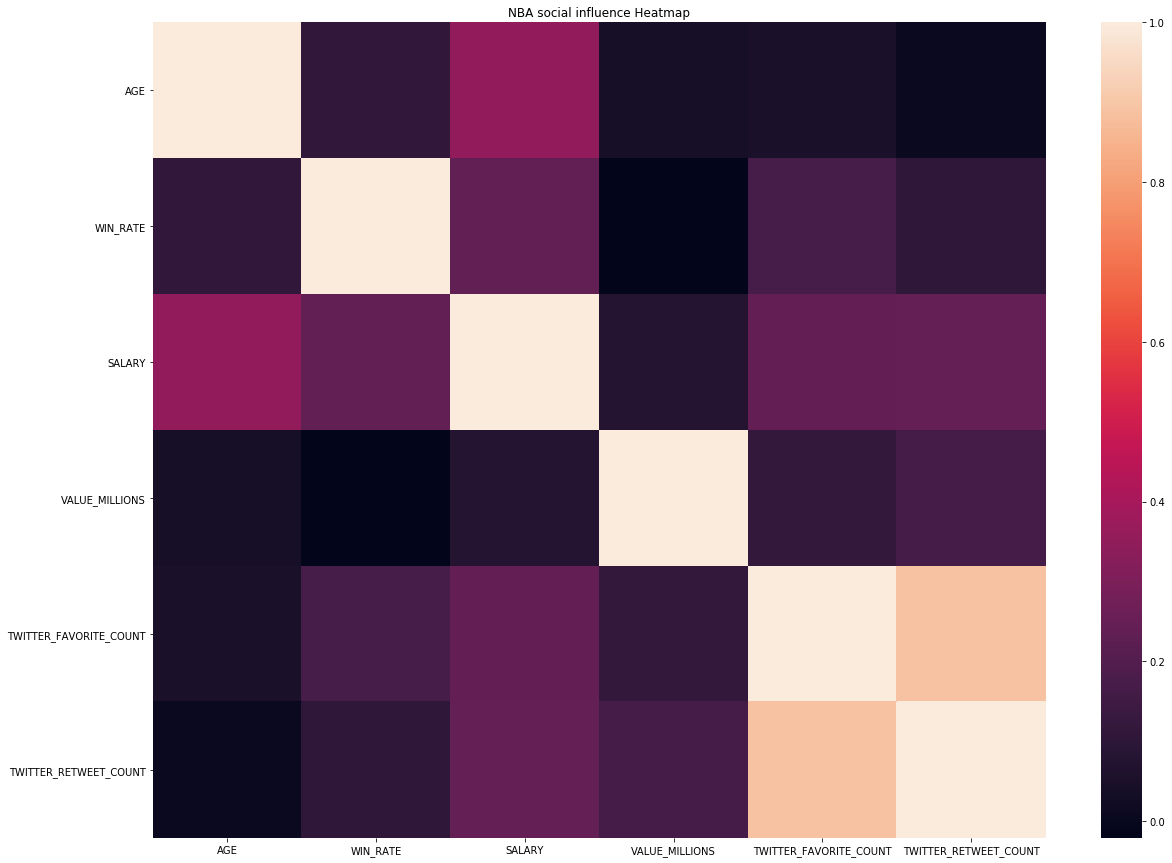

In [257]:
plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("NBA social influence Heatmap")
corr = social_influence.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

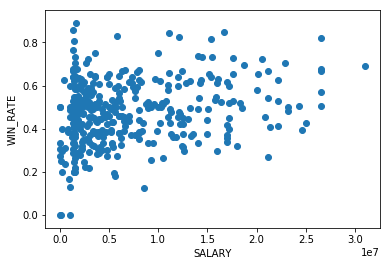

In [258]:
plt.scatter(social_influence['SALARY'],social_influence['WIN_RATE'])
plt.xlabel('SALARY')
plt.ylabel('WIN_RATE')
plt.show()

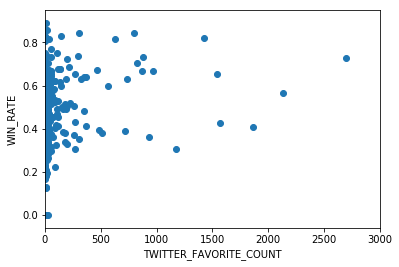

In [259]:
plt.xlim(0,3000)
plt.scatter(social_influence['TWITTER_FAVORITE_COUNT'],social_influence['WIN_RATE'])
plt.xlabel('TWITTER_FAVORITE_COUNT')
plt.ylabel('WIN_RATE')
plt.show()

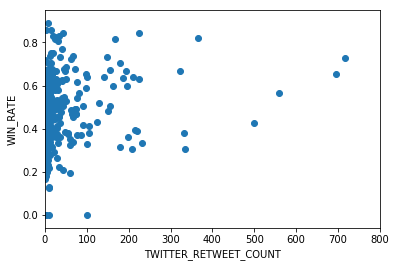

In [260]:
plt.xlim(0,800)
plt.scatter(social_influence['TWITTER_RETWEET_COUNT'],social_influence['WIN_RATE'])
plt.xlabel('TWITTER_RETWEET_COUNT')
plt.ylabel('WIN_RATE')
plt.show()

In [261]:
social_influence = social_influence.dropna()

cols = ['PLAYER','POSITION','TEAM']
num_cols = list(social_influence.drop(cols,axis = 1).columns.drop('WIN_RATE'))
for col in num_cols:
    social_influence[col + 'scaled'] = minmax_scale(social_influence[col])
    social_influence = social_influence.drop(col,axis = 1)
    
for col in cols:
    dummies = pd.get_dummies(social_influence[col], prefix = col)
    social_influence = pd.concat([social_influence,dummies], axis = 1)
    social_influence = social_influence.drop(col,axis = 1)

social_influence.head()

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64.
  warnings.warn(msg, DataConversionWarning)


,WIN_RATE,AGEscaled,SALARYscaled,VALUE_MILLIONSscaled,TWITTER_FAVORITE_COUNTscaled,TWITTER_RETWEET_COUNTscaled,PLAYER_Aaron Brooks,PLAYER_Aaron Gordon,PLAYER_Adreian Payne,PLAYER_Al Horford,...,TEAM_Oklahoma City Thunder,TEAM_Orlando Magic,TEAM_Philadelphia 76ers,TEAM_Phoenix Suns,TEAM_Portland Trail Blazers,TEAM_Sacramento Kings,TEAM_San Antonio Spurs,TEAM_Toronto Raptors,TEAM_Utah Jazz,TEAM_Washington Wizards
0,0.567901,0.428571,0.855579,0.107843,0.173522,0.190071,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0.413333,0.238095,0.713753,0.000000,0.029972,0.035362,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0.666667,0.380952,0.855579,0.352941,0.078922,0.109317,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0.822581,0.428571,0.855579,0.725490,0.116102,0.124447,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0.689189,0.619048,1.000000,0.176471,0.450684,0.510541,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [265]:
X = social_influence.drop('WIN_RATE', axis = 1)
y = social_influence['WIN_RATE']

In [268]:
linear = linear_model.LinearRegression()
linear.fit(X, y)
linear.score(X, y)
print('Coefficient: n', linear.coef_)
print('Intercept: n', linear.intercept_)

Coefficient: n [  1.87772930e-02   1.46938017e-13   1.59378660e-02   7.07175220e-02
   3.92450154e-02   1.59231660e-02   9.31527835e-03  -8.47736251e-02
   8.32841585e-02   3.64211831e-02   6.52533110e-04   1.11700000e-02
  -2.02968202e-02   2.83746909e-02   8.71340258e-02   3.87594885e-02
  -2.24902689e-01   5.54985984e-03  -5.51046543e-02   8.17464412e-03
  -1.74058207e-01  -8.16129811e-02   8.53434924e-03  -3.85822225e-02
   2.21423838e-01   3.68646045e-02  -1.40619899e-02   1.59993962e-02
   3.45767537e-02  -7.02513023e-03  -5.03741236e-02  -5.70977453e-02
   1.47656594e-01   3.04752392e-01  -3.38083190e-02  -3.70628987e-02
  -4.90257817e-02  -2.05986342e-04   2.39334852e-02   5.35872298e-02
  -9.18848182e-02   1.18983426e-01   2.48569797e-02   1.76312961e-01
   2.03642144e-03  -1.70487617e-02  -6.91930284e-02  -2.16746266e-02
   9.64833312e-03   4.44668945e-02   1.75458214e-02  -2.11708584e-02
  -3.96107803e-02   3.37724937e-02   3.53107800e-02   1.88206486e-02
   9.34665779e-02  